# Histogram figures for paper


In [1]:
import beamtime_config_2022
from beamtime_config_2022 import *

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from matplotlib import rc
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
import seaborn as sns

import xrf_roif_2022

from xrf_roif_2022 import *

import xrfm_batches
from xrfm_batches import *

import fuzzy_kmeans_engine
from fuzzy_kmeans_engine import _format_soft_km_axes, soft_clustering_weights

%matplotlib inline

#  import all coarse scans

In [2]:
BASE_PATCH_WIDTH=32
selected_elm_maps=['Cu','Zn','Ca', 'K', 'P', 'S','Fe','Ni','Total_Fluorescence_Yield']
noise_type='none'
base_file_path = '/data02/AZC/March_2022_XRF_Data/'


# coarse_scan_names = ['bnp_fly0032.mda.h5']


coarse_scan_names = ['bnp_fly0032.mda.h5', 
                    'bnp_fly0042.mda.h5',
                    'bnp_fly0043.mda.h5',
                    'bnp_fly0073.mda.h5',
                    'bnp_fly0082.mda.h5',
                    'bnp_fly0102.mda.h5',
                    'bnp_fly0103.mda.h5',
                    'bnp_fly0104.mda.h5']


# 'bnp_fly0050.mda.h5',
#                     'bnp_fly0051.mda.h5']



hdf5_string_list=['MAPS','MAPS','MAPS','MAPS','MAPS','MAPS','MAPS','MAPS']
norm_ch_list=['US_IC','US_IC','US_IC','US_IC','US_IC','US_IC','US_IC','US_IC']
selected_elm_maps_list=[selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps]
noise_type_list = [noise_type,noise_type,noise_type,noise_type,noise_type,noise_type,noise_type,noise_type]
# bin_conv_elm_list=['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P']
bin_conv_elm_list=['KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa']
apply_gausssian_list=[False, False, False, False,False,False,False,False]
value_offset_list = [1e-12,1e-12,1e-12,1e-12,1e-12,1e-12,1e-12,1e-12]

BASE_PATCH_WIDTH=32
selected_elm_maps=['Cu','Zn','Ca', 'K', 'P', 'S','Fe','Ni','Total_Fluorescence_Yield']
noise_type='none'
base_file_path = '/data02/AZC/March_2022_XRF_Data/'



coarse_scans = XRFM_batch(base_file_path,
                  coarse_scan_names,
                 hdf5_string_list,
                 norm_ch_list,
                 selected_elm_maps_list,
                 noise_type_list,
                 bin_conv_elm_list,
                 value_offset_list,
                apply_gausssian_list,
                 BASE_PATCH_WIDTH,
                 print_pv=False,  
                 verbosity=False)

print('Bounding box width and height (pixels):' , BASE_PATCH_WIDTH)
print('Total extracted cells, features:', coarse_scans.X.shape)
print('Total extracted cell, cell size:', coarse_scans.X_bin.shape)



XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0032.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(41, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0042.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(36, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0043.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(17, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0073.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(19, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0082.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(11, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0102.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']


/data02/AZC/ROI-Finder/flx_workflows/xrf_roif_2022.py:106: RuntimeWarning: divide by zero encountered in true_divide
  xrfdata[e].append(xrf[chidx]/norm)
/data02/AZC/ROI-Finder/flx_workflows/xrf_roif_2022.py:106: RuntimeWarning: invalid value encountered in true_divide
  xrfdata[e].append(xrf[chidx]/norm)


(18, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0103.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(16, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0104.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(17, 14)
Bounding box width and height (pixels): 32
Total extracted cells, features: (175, 14)
Total extracted cell, cell size: (175, 32, 32)


# construct dataframe with all the extracted information

In [3]:
principalDf = pd.DataFrame(
             columns = ['Pixel_count', 'area'])


principalDf['area'] = coarse_scans.X[:,0]
principalDf['eccentricity'] = coarse_scans.X[:,1]
principalDf['equivalent_diameter'] = coarse_scans.X[:,2]
principalDf['major_axis_length'] = coarse_scans.X[:,3]
principalDf['minor_axis_length'] = coarse_scans.X[:,4]
principalDf['perimeter'] = coarse_scans.X[:,5]
principalDf['K'] = coarse_scans.X[:,6]
principalDf['P'] = coarse_scans.X[:,7]
principalDf['Ca'] = coarse_scans.X[:,8]
principalDf['Zn'] = coarse_scans.X[:,9]
principalDf['Fe'] = coarse_scans.X[:,10]
principalDf['Cu'] = coarse_scans.X[:,11]
principalDf['BFY'] = coarse_scans.X[:,12]
principalDf['Pixel_count'] = coarse_scans.X[:,13].astype(int)   #Pixel_count column must exist

#add res and origins to dataframe here
#convert from list
principalDf['x_res'] = coarse_scans.X_x_res
principalDf['y_res'] = coarse_scans.X_y_res
principalDf['avg_res'] = coarse_scans.X_avg_res
principalDf['x_origin'] = coarse_scans.X_x_origin
principalDf['y_origin'] = coarse_scans.X_y_origin
principalDf['x_motor'] = coarse_scans.X_x_motor
principalDf['y_motor'] = coarse_scans.X_y_motor
principalDf['xrf_file']=coarse_scans.X_xrf_track_files




#assign scan names in dataframe
number_of_cells = principalDf['xrf_file'].to_numpy().shape[0]
coarse_scan_name=[]
for idx in range(number_of_cells):

    coarse_scan_name.append(os.path.split(principalDf['xrf_file'].to_numpy()[idx])[1])
principalDf['scan_name'] =  np.array(coarse_scan_name)  


display(principalDf)

,Pixel_count,area,eccentricity,equivalent_diameter,major_axis_length,minor_axis_length,perimeter,K,P,Ca,...,BFY,x_res,y_res,avg_res,x_origin,y_origin,x_motor,y_motor,xrf_file,scan_name
0,5,0.3125,0.000000,0.630783,0.632456,0.632456,1.414214,0.000042,0.000038,0.000047,...,0.007212,0.25,0.256287,0.253143,110.674377,-661.065186,139.674377,-655.565186,/data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...,bnp_fly0032.mda.h5
1,31,1.9375,0.926864,1.570637,2.566840,0.963588,5.242641,0.000042,0.000085,0.000074,...,0.007246,0.25,0.256287,0.253143,110.674377,-661.065186,175.174377,-654.565186,/data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...,bnp_fly0032.mda.h5
2,5,0.3125,0.000000,0.630783,0.632456,0.632456,1.414214,0.000036,0.000046,0.000051,...,0.007115,0.25,0.256287,0.253143,110.674377,-661.065186,140.174377,-653.815186,/data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...,bnp_fly0032.mda.h5
3,21,1.3125,0.945323,1.292721,2.313760,0.754599,3.828427,0.000069,0.000055,0.000065,...,0.007196,0.25,0.256287,0.253143,110.674377,-661.065186,121.424377,-652.315186,/data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...,bnp_fly0032.mda.h5
4,11,0.6875,0.755929,0.935603,1.128152,0.738549,2.414214,0.000046,0.000057,0.000034,...,0.007210,0.25,0.256287,0.253143,110.674377,-661.065186,139.174377,-650.565186,/data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...,bnp_fly0032.mda.h5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,14,0.8750,0.850688,1.055502,1.465135,0.770179,2.767767,0.000104,0.000051,0.000135,...,0.000799,0.25,0.272903,0.261452,800.212036,-155.992310,801.212036,-123.742310,/data02/AZC/March_2022_XRF_Data/bnp_fly0104.md...,bnp_fly0104.mda.h5
171,20,1.2500,0.859510,1.261566,1.810667,0.925465,3.828427,0.000111,0.000067,0.000038,...,0.000813,0.25,0.272903,0.261452,800.212036,-155.992310,819.462036,-123.242310,/data02/AZC/March_2022_XRF_Data/bnp_fly0104.md...,bnp_fly0104.mda.h5
172,34,2.1250,0.939338,1.644881,2.891355,0.991711,5.681981,0.000133,0.000077,0.000038,...,0.000947,0.25,0.272903,0.261452,800.212036,-155.992310,805.462036,-121.242310,/data02/AZC/March_2022_XRF_Data/bnp_fly0104.md...,bnp_fly0104.mda.h5
173,29,1.8125,0.432967,1.519127,1.606889,1.448465,4.474874,0.000136,0.000089,0.000035,...,0.000954,0.25,0.272903,0.261452,800.212036,-155.992310,812.962036,-119.242310,/data02/AZC/March_2022_XRF_Data/bnp_fly0104.md...,bnp_fly0104.mda.h5


# remove extracted cells that contain less than certain amount of pixels

In [4]:
secondaryDf=remove_artifacts(principalDf, remove_count = 8)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(secondaryDf)

# secondaryDf.head()

/data02/AZC/ROI-Finder/flx_workflows/xrf_roif_2022.py:865: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secondaryDf['original index'] = secondaryDf.index.to_numpy()


,Pixel_count,area,eccentricity,equivalent_diameter,major_axis_length,minor_axis_length,perimeter,K,P,Ca,Zn,Fe,Cu,BFY,x_res,y_res,avg_res,x_origin,y_origin,x_motor,y_motor,xrf_file,scan_name,original index
0,31,1.9375,0.926864,1.570637,2.566840,0.963588,5.242641,0.000042,0.000085,0.000074,0.000071,0.000048,0.000072,0.007246,0.25,0.256287,0.253143,110.674377,-661.065186,175.174377,-654.565186,/data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...,bnp_fly0032.mda.h5,1
1,21,1.3125,0.945323,1.292721,2.313760,0.754599,3.828427,0.000069,0.000055,0.000065,0.000051,0.000035,0.000046,0.007196,0.25,0.256287,0.253143,110.674377,-661.065186,121.424377,-652.315186,/data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...,bnp_fly0032.mda.h5,3
2,11,0.6875,0.755929,0.935603,1.128152,0.738549,2.414214,0.000046,0.000057,0.000034,0.000053,0.000040,0.000037,0.007210,0.25,0.256287,0.253143,110.674377,-661.065186,139.174377,-650.565186,/data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...,bnp_fly0032.mda.h5,4
3,42,2.6250,0.926738,1.828183,3.026790,1.137187,6.389087,0.000054,0.000088,0.000078,0.000055,0.000042,0.000059,0.007298,0.25,0.256287,0.253143,110.674377,-661.065186,178.674377,-648.065186,/data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...,bnp_fly0032.mda.h5,5
4,18,1.1250,0.722659,1.196827,1.423347,0.983824,3.267767,0.000042,0.000064,0.000100,0.000070,0.000044,0.000052,0.007146,0.25,0.256287,0.253143,110.674377,-661.065186,126.924377,-648.065186,/data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...,bnp_fly0032.mda.h5,6
5,49,3.0625,0.925859,1.974664,3.245418,1.226342,7.035534,0.000044,0.000089,0.000127,0.000077,0.000041,0.000051,0.007242,0.25,0.256287,0.253143,110.674377,-661.065186,152.424377,-647.565186,/data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...,bnp_fly0032.mda.h5,7
6,95,5.9375,0.993093,2.749520,8.450952,0.991554,15.906854,0.000055,0.000079,0.000064,0.000049,0.000051,0.000058,0.007374,0.25,0.256287,0.253143,110.674377,-661.065186,134.924377,-643.565186,/data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...,bnp_fly0032.mda.h5,8
7,38,2.3750,0.927087,1.738949,2.844144,1.066118,5.974874,0.000055,0.000073,0.000113,0.000045,0.000046,0.000046,0.007229,0.25,0.256287,0.253143,110.674377,-661.065186,142.924377,-644.565186,/data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...,bnp_fly0032.mda.h5,9
8,47,2.9375,0.984730,1.933944,4.921048,0.856704,7.303301,0.000050,0.000099,0.000051,0.000058,0.000039,0.000058,0.007299,0.25,0.256287,0.253143,110.674377,-661.065186,173.174377,-644.065186,/data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...,bnp_fly0032.mda.h5,10
9,50,3.1250,0.977717,1.994711,4.549151,0.955001,8.010408,0.000050,0.000064,0.000114,0.000078,0.000044,0.000051,0.007258,0.25,0.256287,0.253143,110.674377,-661.065186,112.674377,-642.565186,/data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...,bnp_fly0032.mda.h5,11


Cells, features (156, 7)
Cells, PCs (156, 2)
singular_values_: [20.27365555 14.17534267]
explained_variance: [2.65174909 1.29638929]
components: [[ 0.2112239   0.34539418 -0.38822042  0.44833624  0.52280108  0.45658445
  -0.05075946]
 [ 0.64040329  0.39040773  0.47810755 -0.16334869  0.03959646 -0.02283494
   0.42438956]]


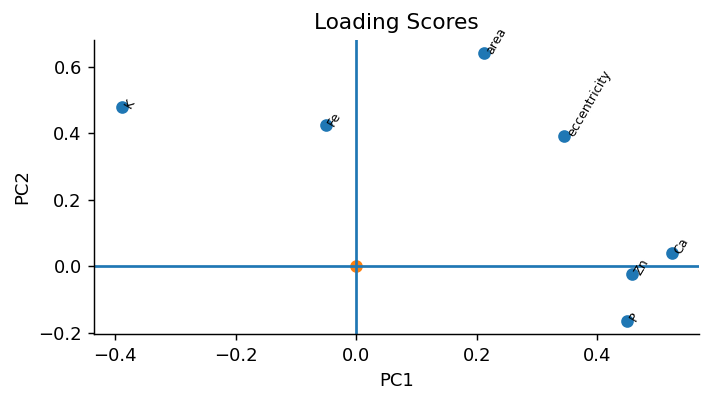

<Figure size 432x288 with 0 Axes>

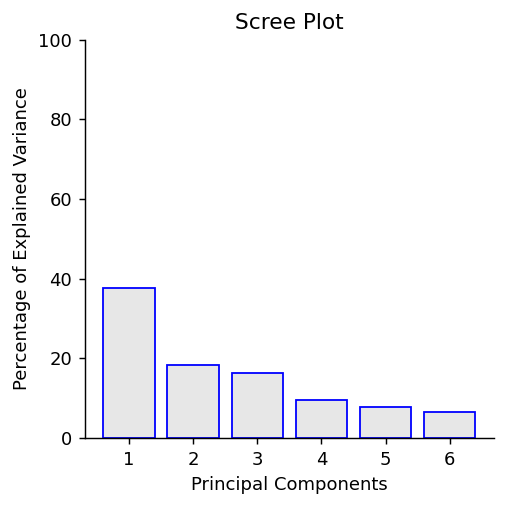

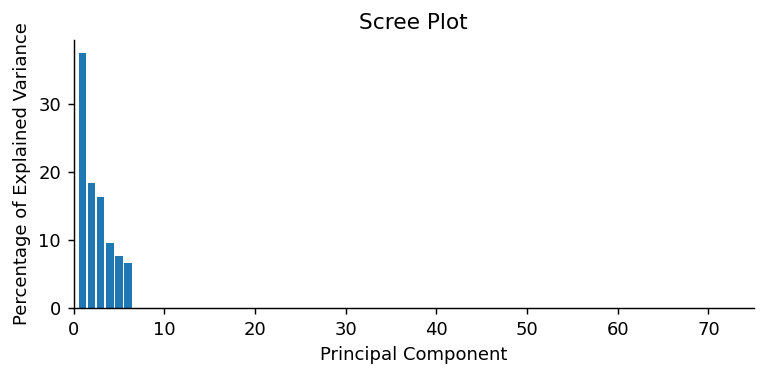

/tmp/ipykernel_31357/632884281.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secondaryDf['PC1']=principalComponents[:,0]
/tmp/ipykernel_31357/632884281.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secondaryDf['PC2']=principalComponents[:,1]


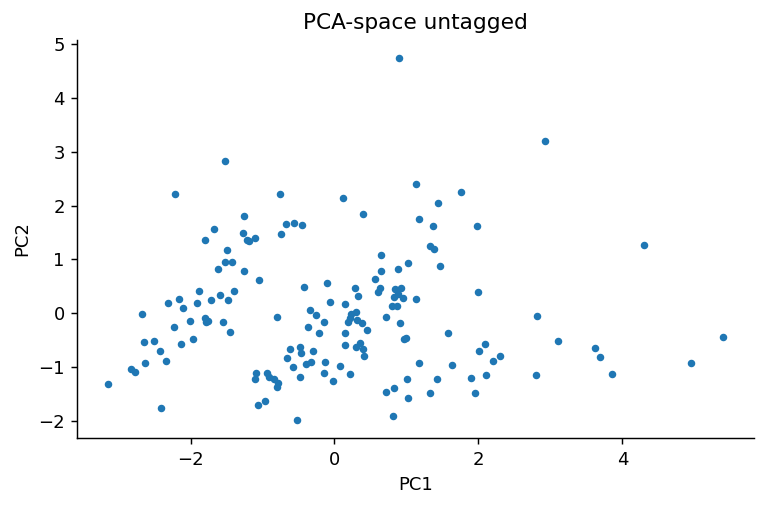

In [9]:
mod_X = np.asarray([
    secondaryDf['area'],secondaryDf['eccentricity'],
    secondaryDf['K'],secondaryDf['P'],secondaryDf['Ca'],secondaryDf['Zn'],secondaryDf['Fe']
               ]).T

print('Cells, features', mod_X.shape)

%matplotlib inline

# feature_names = ['area','eccentricity','equiv. dia.','major length','minor length','perimeter',
#         'K','P','Ca','Zn',
#          'Fe']

feature_names = ['area','eccentricity','K','P','Ca','Zn','Fe']


principalComponents, loading_scores = XRF_PCA(mod_X, feature_names, high_comp=6, n_components=2, 
                                              annot_txt_size=7, dpi =130, marker_size=3,save_plots=True)

#assign PC values to dataframe
secondaryDf['PC1']=principalComponents[:,0]
secondaryDf['PC2']=principalComponents[:,1]




In [10]:
# condition check

labels = [0] * mod_X.shape[0]
dwell_times = [float(100)] * mod_X.shape[0]
print(dwell_times)
text_labels=labels

True_list = secondaryDf.loc[
    (secondaryDf['scan_name']=='bnp_fly0032.mda.h5') | 
    (secondaryDf['scan_name']=='bnp_fly0042.mda.h5') | 
    (secondaryDf['scan_name']=='bnp_fly0043.mda.h5')  
   ].index.tolist()    
    
print('Length true list: ', len(True_list) )

for idx in True_list:
    labels[idx]=1 
# print(labels)



True_list = secondaryDf.loc[
    (secondaryDf['scan_name']=='bnp_fly0102.mda.h5') 
   ].index.tolist()    
    
print('Length true list 102 : ', len(True_list) )
for idx in True_list:
    labels[idx]=2 
    dwell_times[idx]=50.0
    
True_list = secondaryDf.loc[
    (secondaryDf['scan_name']=='bnp_fly0103.mda.h5') 
   ].index.tolist()    
    
print('Length true list 103: ', len(True_list) )
for idx in True_list:
    labels[idx]=2 
    dwell_times[idx]=25.0
    
True_list = secondaryDf.loc[
    (secondaryDf['scan_name']=='bnp_fly0104.mda.h5') 
   ].index.tolist()    
    
print('Length true list 104: ', len(True_list) )
for idx in True_list:
    labels[idx]=2 
    dwell_times[idx]=12.5
    
print('Length true list: ', len(True_list) )
print(labels)

y_dh=np.array(labels).astype(int)    #domain h labels
y=labels

RANGE=mod_X.shape[0]

for idx in range(RANGE):
    if text_labels[idx] ==0:
        text_labels[idx] = 'Type B'
    if text_labels[idx] ==1:
        text_labels[idx] = 'Type A'
    if text_labels[idx] ==2:
        text_labels[idx] = 'Type C'
   
        
secondaryDf['text_labels'] = text_labels
secondaryDf['dwell_times'] = dwell_times
secondaryDf['inv_dwell_times'] = np.reciprocal(np.array(dwell_times))


# plt.savefig('../figures/Noise_Analysis1.jpg')

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0

/tmp/ipykernel_31357/3009557881.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secondaryDf['text_labels'] = text_labels
/tmp/ipykernel_31357/3009557881.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secondaryDf['dwell_times'] = dwell_times
/tmp/ipykernel_31357/3009557881.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

# view distribution of features for the two kmeans classes

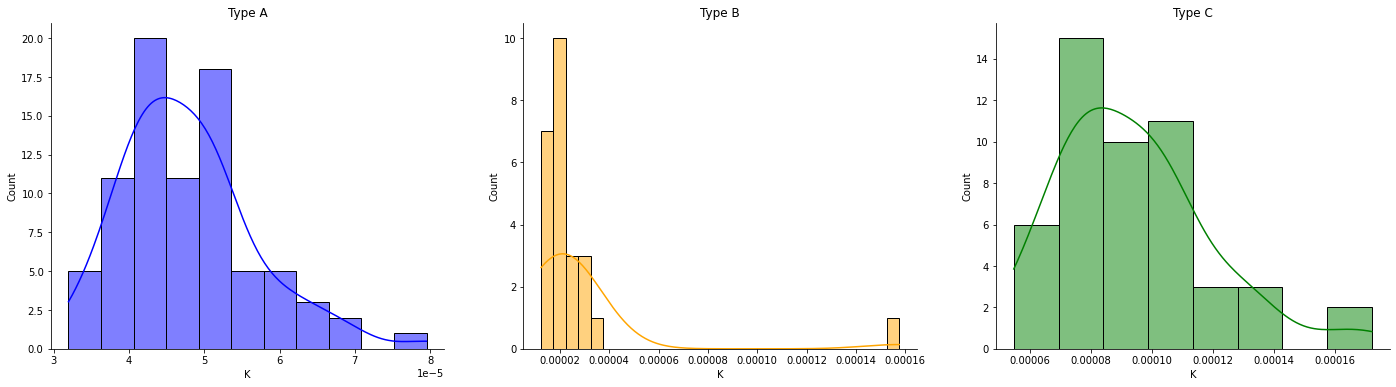

In [25]:
select_feature_channel = 'K'

# secondaryDf[secondaryDf['text_labels']==0][select_feature_channel]
%matplotlib inline

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

sns.histplot(ax=ax[0],data=secondaryDf[secondaryDf['text_labels']=='Type A'], x=select_feature_channel, kde=True,color='blue')
ax[0].set_title('Type A');

sns.histplot(ax=ax[1],data=secondaryDf[secondaryDf['text_labels']=='Type B'], x=select_feature_channel, kde=True,color='orange')
ax[1].set_title('Type B');

sns.histplot(ax=ax[2],data=secondaryDf[secondaryDf['text_labels']=='Type C'], x=select_feature_channel, kde=True,color='green')
ax[2].set_title('Type C');



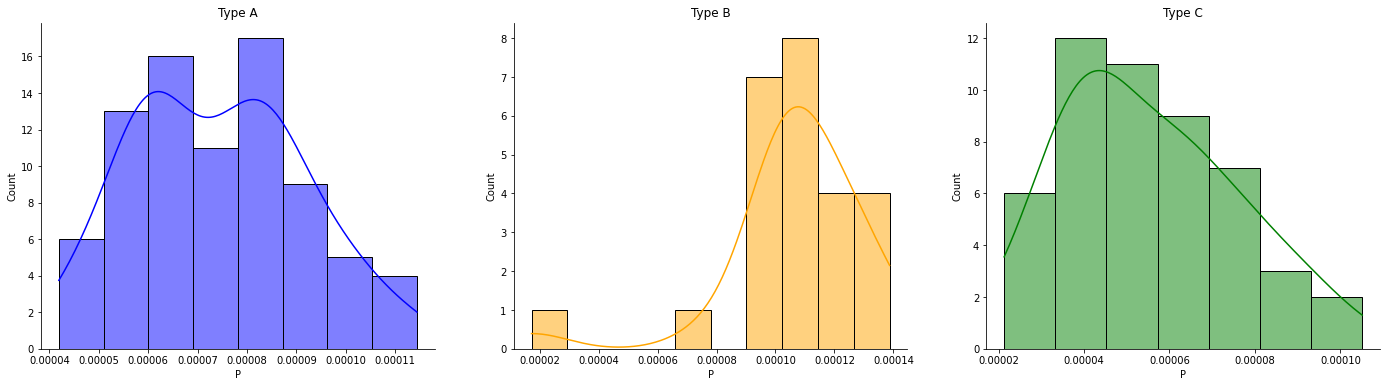

In [26]:
select_feature_channel = 'P'

# secondaryDf[secondaryDf['text_labels']==0][select_feature_channel]
%matplotlib inline

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

sns.histplot(ax=ax[0],data=secondaryDf[secondaryDf['text_labels']=='Type A'], x=select_feature_channel, kde=True,color='blue')
ax[0].set_title('Type A');

sns.histplot(ax=ax[1],data=secondaryDf[secondaryDf['text_labels']=='Type B'], x=select_feature_channel, kde=True,color='orange')
ax[1].set_title('Type B');

sns.histplot(ax=ax[2],data=secondaryDf[secondaryDf['text_labels']=='Type C'], x=select_feature_channel, kde=True,color='green')
ax[2].set_title('Type C');



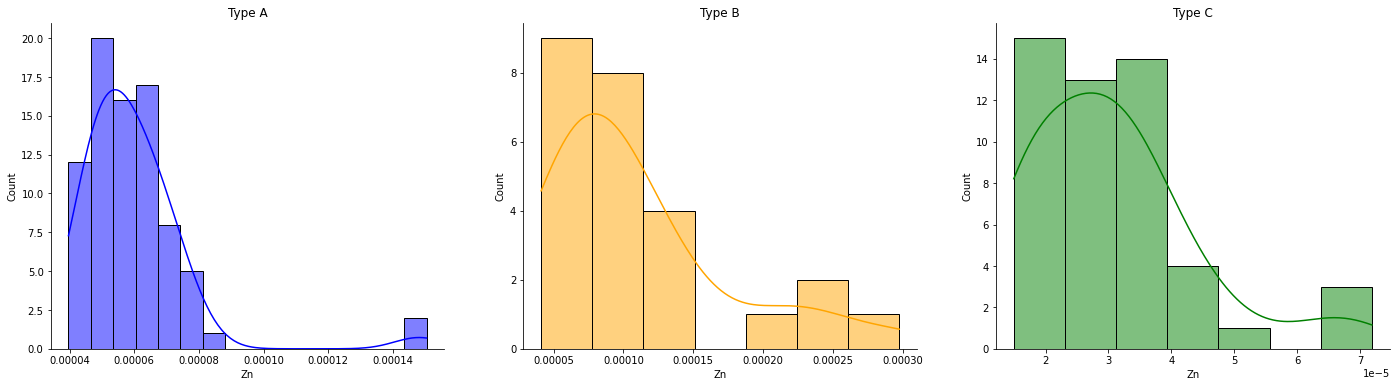

In [27]:
select_feature_channel = 'Zn'

# secondaryDf[secondaryDf['text_labels']==0][select_feature_channel]
%matplotlib inline

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

sns.histplot(ax=ax[0],data=secondaryDf[secondaryDf['text_labels']=='Type A'], x=select_feature_channel, kde=True,color='blue')
ax[0].set_title('Type A');

sns.histplot(ax=ax[1],data=secondaryDf[secondaryDf['text_labels']=='Type B'], x=select_feature_channel, kde=True,color='orange')
ax[1].set_title('Type B');

sns.histplot(ax=ax[2],data=secondaryDf[secondaryDf['text_labels']=='Type C'], x=select_feature_channel, kde=True,color='green')
ax[2].set_title('Type C');



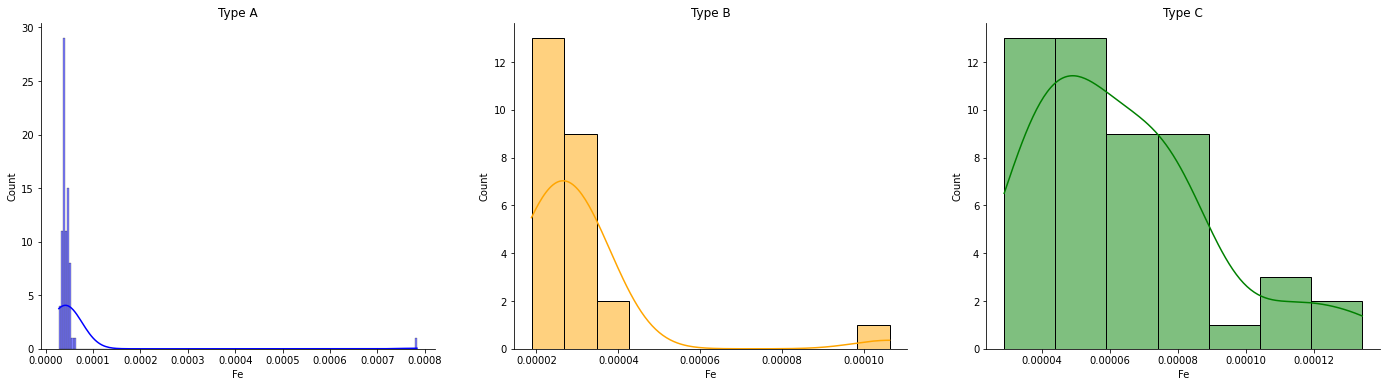

In [28]:
select_feature_channel = 'Fe'

# secondaryDf[secondaryDf['text_labels']==0][select_feature_channel]
%matplotlib inline

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

sns.histplot(ax=ax[0],data=secondaryDf[secondaryDf['text_labels']=='Type A'], x=select_feature_channel, kde=True,color='blue')
ax[0].set_title('Type A');

sns.histplot(ax=ax[1],data=secondaryDf[secondaryDf['text_labels']=='Type B'], x=select_feature_channel, kde=True,color='orange')
ax[1].set_title('Type B');

sns.histplot(ax=ax[2],data=secondaryDf[secondaryDf['text_labels']=='Type C'], x=select_feature_channel, kde=True,color='green')
ax[2].set_title('Type C');



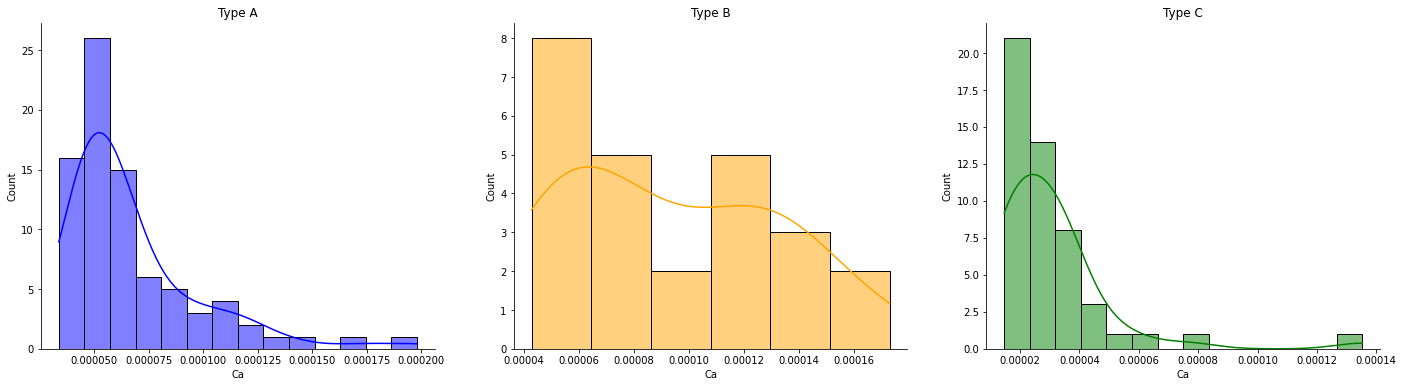

In [29]:
select_feature_channel = 'Ca'

# secondaryDf[secondaryDf['text_labels']==0][select_feature_channel]
%matplotlib inline

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

sns.histplot(ax=ax[0],data=secondaryDf[secondaryDf['text_labels']=='Type A'], x=select_feature_channel, kde=True,color='blue')
ax[0].set_title('Type A');

sns.histplot(ax=ax[1],data=secondaryDf[secondaryDf['text_labels']=='Type B'], x=select_feature_channel, kde=True,color='orange')
ax[1].set_title('Type B');

sns.histplot(ax=ax[2],data=secondaryDf[secondaryDf['text_labels']=='Type C'], x=select_feature_channel, kde=True,color='green')
ax[2].set_title('Type C');



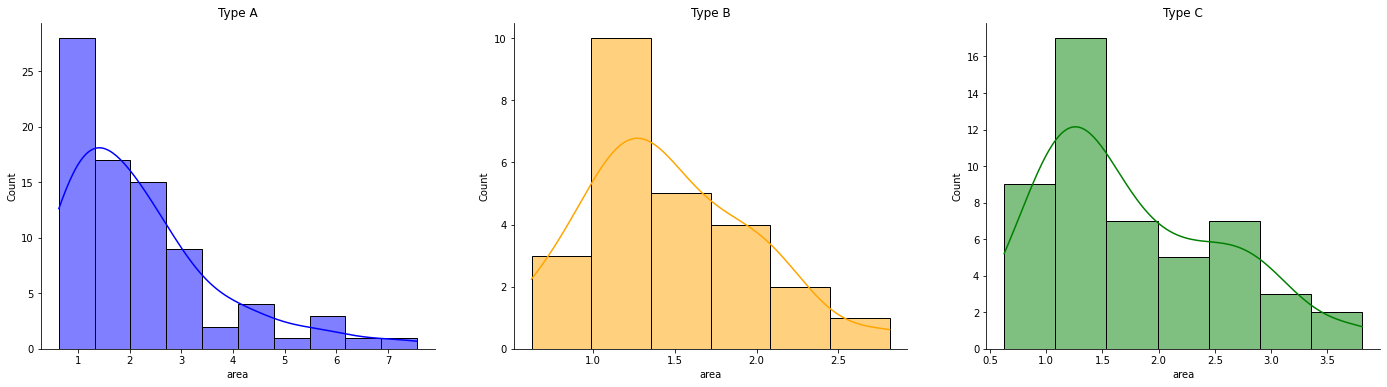

In [30]:
select_feature_channel = 'area'

# secondaryDf[secondaryDf['text_labels']==0][select_feature_channel]
%matplotlib inline

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

sns.histplot(ax=ax[0],data=secondaryDf[secondaryDf['text_labels']=='Type A'], x=select_feature_channel, kde=True,color='blue')
ax[0].set_title('Type A');

sns.histplot(ax=ax[1],data=secondaryDf[secondaryDf['text_labels']=='Type B'], x=select_feature_channel, kde=True,color='orange')
ax[1].set_title('Type B');

sns.histplot(ax=ax[2],data=secondaryDf[secondaryDf['text_labels']=='Type C'], x=select_feature_channel, kde=True,color='green')
ax[2].set_title('Type C');



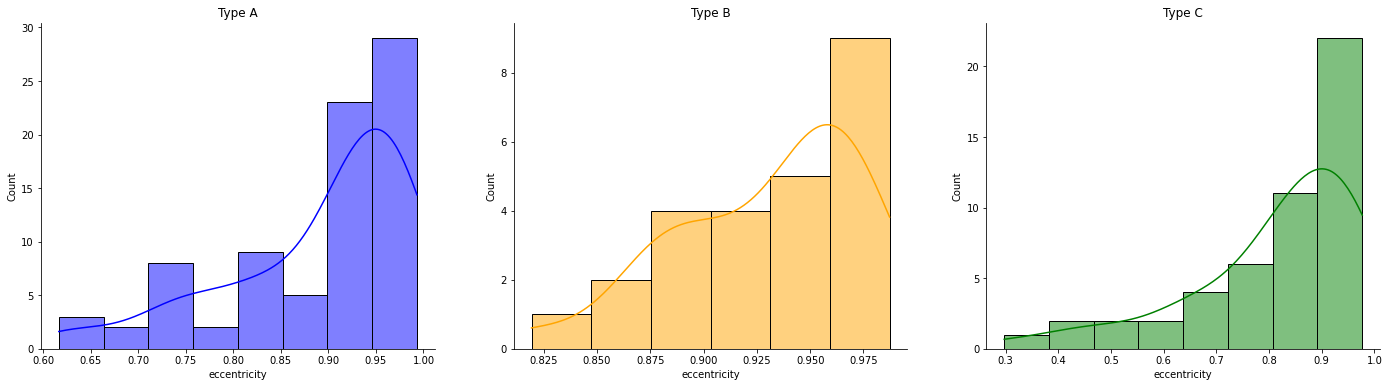

In [31]:
select_feature_channel = 'eccentricity'

# secondaryDf[secondaryDf['text_labels']==0][select_feature_channel]
%matplotlib inline

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

sns.histplot(ax=ax[0],data=secondaryDf[secondaryDf['text_labels']=='Type A'], x=select_feature_channel, kde=True,color='blue')
ax[0].set_title('Type A');

sns.histplot(ax=ax[1],data=secondaryDf[secondaryDf['text_labels']=='Type B'], x=select_feature_channel, kde=True,color='orange')
ax[1].set_title('Type B');

sns.histplot(ax=ax[2],data=secondaryDf[secondaryDf['text_labels']=='Type C'], x=select_feature_channel, kde=True,color='green')
ax[2].set_title('Type C');

